In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from colorama import Fore

In [42]:
df = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv")

In [43]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [44]:
df.isna().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [45]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1) 
# p24 ve p 25 birbirine aşırı uyum sağlıyor birine gerek yok

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Volume_C10_Petrignano                 4198 non-null   float64
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [47]:
df2 = df.drop("Date",axis=1)
df2.corr(method ='pearson')

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Rainfall_Bastia_Umbra,1.000000,0.067708,-0.052813,0.136405,0.141373
Depth_to_Groundwater_P25,0.067708,1.000000,0.117417,0.360793,0.000276
Temperature_Bastia_Umbra,-0.052813,0.117417,1.000000,-0.069267,-0.434575
Volume_C10_Petrignano,0.136405,0.360793,-0.069267,1.000000,0.216617
Hydrometry_Fiume_Chiascio_Petrignano,0.141373,0.000276,-0.434575,0.216617,1.000000


In [48]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

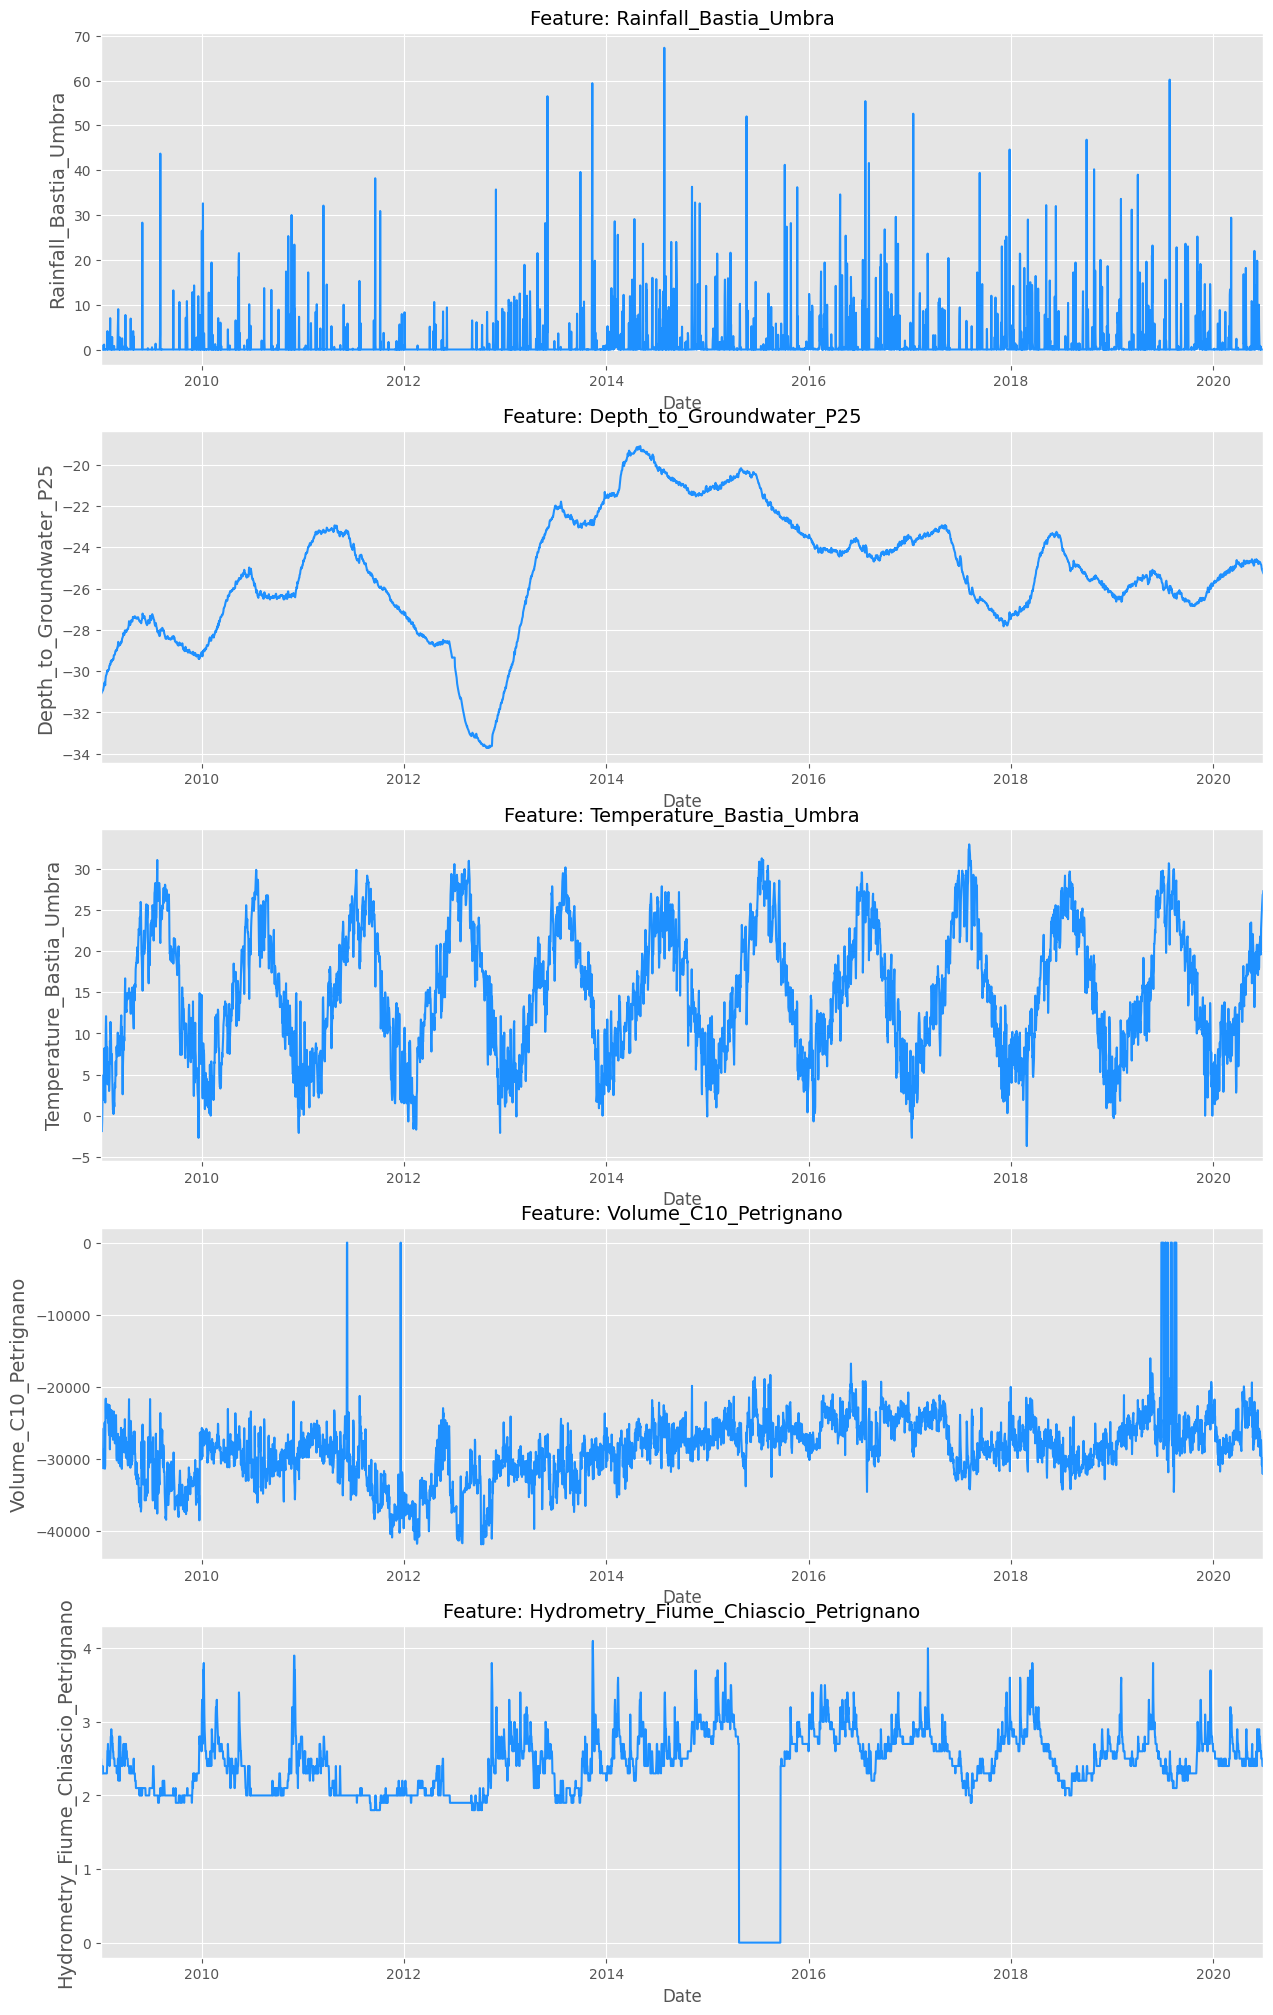

In [49]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

In [50]:
# zaman aralığı kontrolü (zaman aralıkları eşit olmalıdır!)

df = df.sort_values(by='Date')

df['period'] = df['Date'] - df['Date'].shift(1)

df['period'].sum(), df['period'].count()

(Timedelta('4198 days 00:00:00'), 4198)

In [51]:
df = df.drop('period', axis=1) # gerekli verilere baktık artık bir amacı kalmadı.
df.isna().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

In [52]:
df = df.fillna(df.mean())

In [53]:
# kısaca verileri sıkıştırdım denebilir
downsample = df[['Date',
                 'Rainfall_Bastia_Umbra', 
                 'Depth_to_Groundwater_P25',
                 'Temperature_Bastia_Umbra', 
                 'Volume_C10_Petrignano',
                 'Hydrometry_Fiume_Chiascio_Petrignano'
                ]].resample('7D', on='Date').mean().reset_index(drop=False)

df = downsample.copy()


In [54]:
df.isna().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [55]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

In [56]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,year,month,day,day_of_year,quarter,season
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429,2009,1,1,1,1,1
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286,2009,1,8,8,1,1
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000,2009,1,15,15,1,1
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000,2009,1,22,22,1,1
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000,2009,1,29,29,1,1


In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra', 
    'Volume_C10_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [59]:
for column in core_columns:
    df[f'{column}_lag_4'] = df[f'{column}_seasonal'].shift(4)
    df[f'{column}_lag_8'] = df[f'{column}_seasonal'].shift(8)
    df[f'{column}_lag_12'] = df[f'{column}_seasonal'].shift(12)


In [60]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,year,month,day,day_of_year,...,Depth_to_Groundwater_P25_lag_12,Temperature_Bastia_Umbra_lag_4,Temperature_Bastia_Umbra_lag_8,Temperature_Bastia_Umbra_lag_12,Volume_C10_Petrignano_lag_4,Volume_C10_Petrignano_lag_8,Volume_C10_Petrignano_lag_12,Hydrometry_Fiume_Chiascio_Petrignano_lag_4,Hydrometry_Fiume_Chiascio_Petrignano_lag_8,Hydrometry_Fiume_Chiascio_Petrignano_lag_12
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429,2009,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286,2009,1,8,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000,2009,1,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000,2009,1,22,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000,2009,1,29,29,...,NaN,-9.73992,NaN,NaN,1466.000089,NaN,NaN,0.295306,NaN,NaN


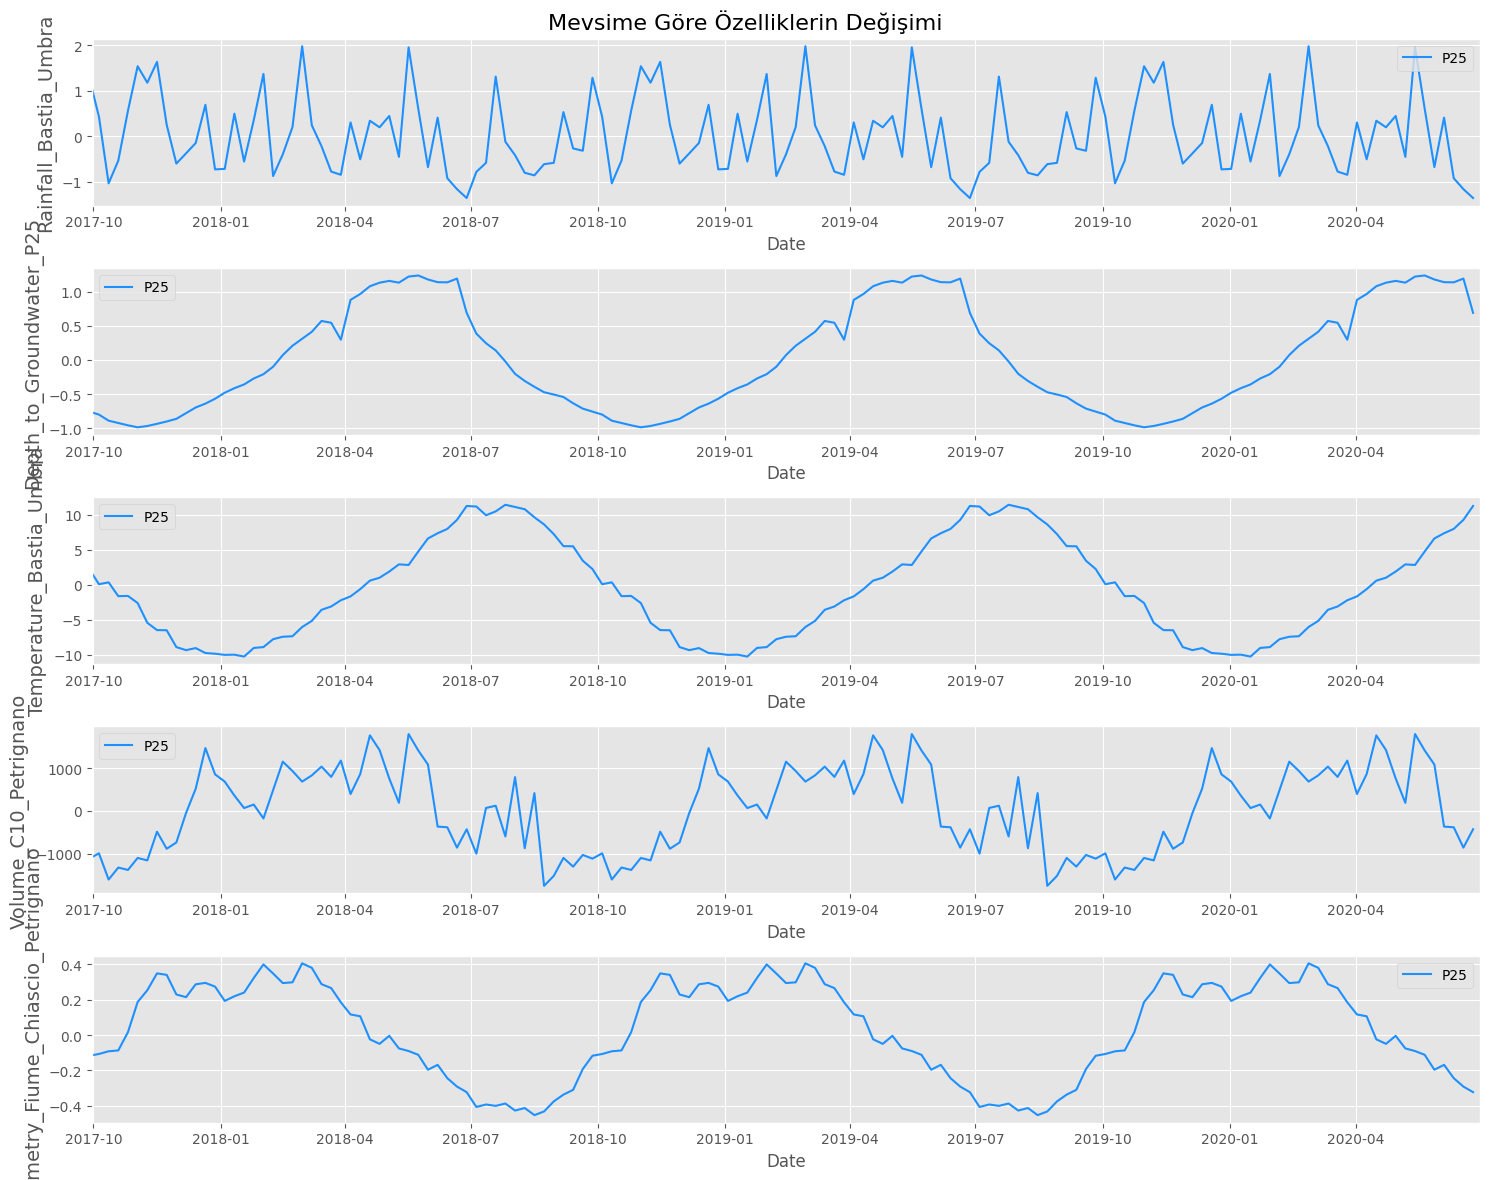

In [61]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Mevsime Göre Özelliklerin Değişimi', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

# **Modelleme**

# **LSTM**

In [62]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['Date']
y = df['Depth_to_Groundwater_P25']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [64]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])

dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

In [65]:

look_back = 52

train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

406 90


In [66]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
406/406 [==============================] - 6s 6ms/step - loss: 0.0125 - val_loss: 0.0018
Epoch 2/5
406/406 [==============================] - 2s 4ms/step - loss: 0.0038 - val_loss: 7.3503e-04
Epoch 3/5
406/406 [==============================] - 2s 4ms/step - loss: 0.0025 - val_loss: 0.0090
Epoch 4/5
406/406 [==============================] - 2s 4ms/step - loss: 0.0029 - val_loss: 3.6879e-04
Epoch 5/5
406/406 [==============================] - 2s 4ms/step - loss: 0.0027 - val_loss: 0.0010
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            92672     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
             

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from colorama import Fore

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

3/3 [==============================] - 0s 3ms/step
RMSE: 0.46398795989195396


In [68]:
# modelleme 2

In [69]:
feature_columns = [
    'Rainfall_Bastia_Umbra',
    'Temperature_Bastia_Umbra',
    'Hydrometry_Fiume_Chiascio_Petrignano',
    'Volume_C10_Petrignano',
    'season',
]
target_column = ['Depth_to_Groundwater_P25']

train_size = int(0.85 * len(df))

multivariate_df = df[['Date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,Rainfall_Bastia_Umbra,Temperature_Bastia_Umbra,Hydrometry_Fiume_Chiascio_Petrignano,Volume_C10_Petrignano,season
0,2009-01-01,-31.048571,0.000000,1.657143,2.371429,-28164.918857,1
1,2009-01-08,-30.784286,0.285714,4.571429,2.314286,-29755.789714,1
2,2009-01-15,-30.420000,0.028571,7.528571,2.300000,-25463.190857,1
3,2009-01-22,-30.018571,0.585714,6.214286,2.500000,-23854.422857,1
4,2009-01-29,-29.790000,1.414286,5.771429,2.500000,-25210.532571,1


In [70]:
!pip install prophet

In [71]:
from prophet import Prophet

model = Prophet()

model.add_regressor('Volume_C10_Petrignano')
model.add_regressor('Rainfall_Bastia_Umbra')
model.add_regressor('Temperature_Bastia_Umbra')
model.add_regressor('Hydrometry_Fiume_Chiascio_Petrignano')
model.add_regressor('season')

model.fit(train)

y_pred = model.predict(x_valid)

score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
# 1.0269803687391603 => ham hali

17:26:28 - cmdstanpy - INFO - Chain [1] start processing
17:26:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 1.003965798061066


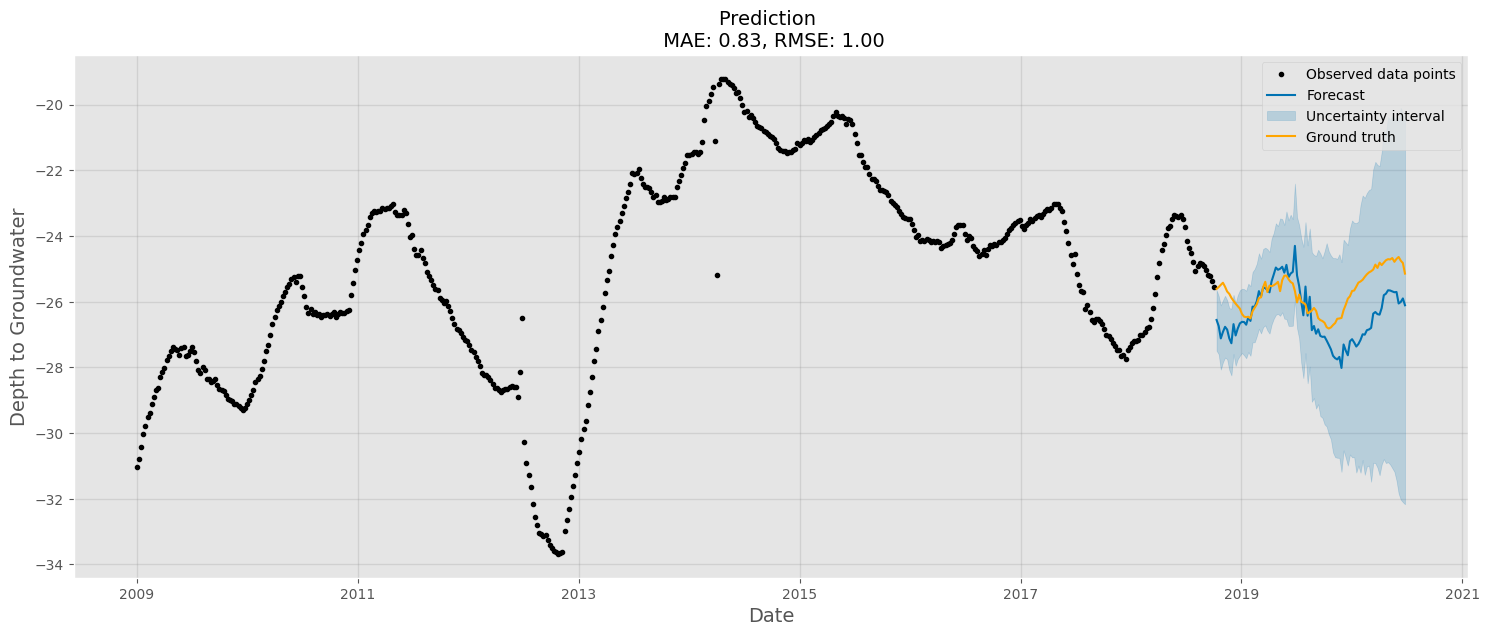

In [72]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()